In [1]:
import multimodal_cci as mmcci
import scanpy as sc
import pickle

#### Load stLearn data objects

In [2]:
stlearn = [
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/sample1_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/sample2_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/sample3_cci.h5ad")
]

with open('/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/squidpy_sample1.pkl', 'rb') as f:
    squidpy1 = pickle.load(f)

with open('/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/squidpy_sample2.pkl', 'rb') as f:
    squidpy2 = pickle.load(f)

with open('/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/squidpy_sample3.pkl', 'rb') as f:
    squidpy3 = pickle.load(f)
    
cellchat_cci = [
    mmcci.tl.read_cellchat("/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/cellchat_v2_sample1.csv"),
    mmcci.tl.read_cellchat("/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/cellchat_v2_sample2.csv"),
    mmcci.tl.read_cellchat("/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/cellchat_v2_sample3.csv")
]

natmi_cci = [
    mmcci.tl.read_natmi("/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/sample1_em/Edges_lrc2p.csv"),
    mmcci.tl.read_natmi("/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/sample2_em/Edges_lrc2p.csv"),
    mmcci.tl.read_natmi("/scratch/project/stseq/Levi/mmcci/mmcci_benchmarking/sample3_em/Edges_lrc2p.csv")
]

squidpy_cci = [squidpy1, squidpy2, squidpy3]

stlearn_cci = [sample.uns['per_lr_cci_cell_type'] for sample in stlearn]

In [3]:
from matplotlib import pyplot as plt

colors = {
    'Bcell': plt.colormaps.get_cmap('tab10').colors[0],
    'Tcell': plt.colormaps.get_cmap('tab10').colors[1],
    'luminal_ar': plt.colormaps.get_cmap('tab10').colors[2],
    'mesenchymal': plt.colormaps.get_cmap('tab10').colors[3],
    'stroma': plt.colormaps.get_cmap('tab10').colors[4],
    'endothelial': plt.colormaps.get_cmap('tab10').colors[5],
    'macrophage': plt.colormaps.get_cmap('tab10').colors[6],
}

/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


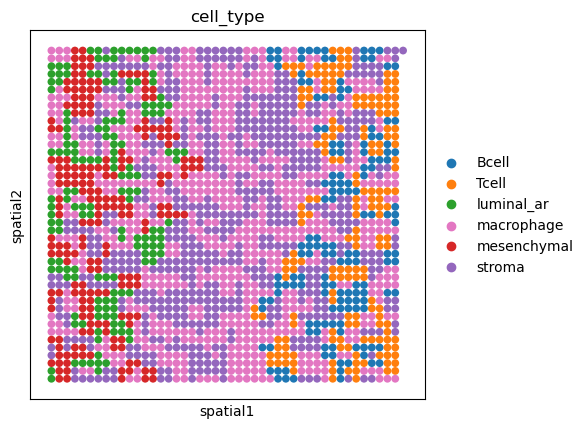

/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


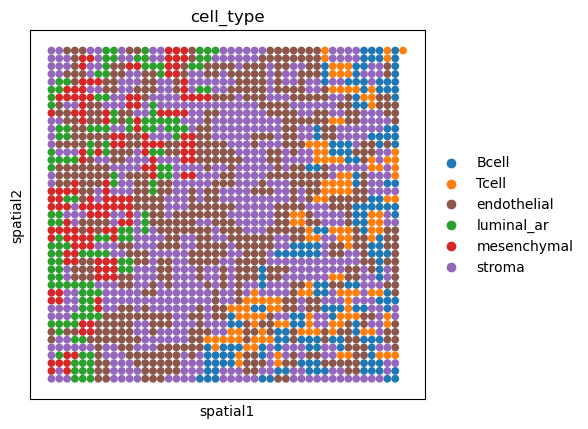

/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


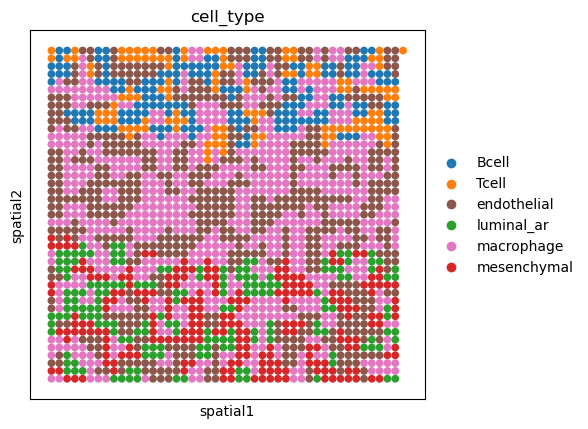

In [4]:
sc.pl.spatial(stlearn[0], color=['cell_type'], palette = colors)
sc.pl.spatial(stlearn[1], color=['cell_type'], palette = colors)
sc.pl.spatial(stlearn[2], color=['cell_type'], palette = colors)

In [5]:
stlearn_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in stlearn_cci]
squidpy_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in squidpy_cci]
cellchat_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in cellchat_cci]
natmi_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in natmi_cci]

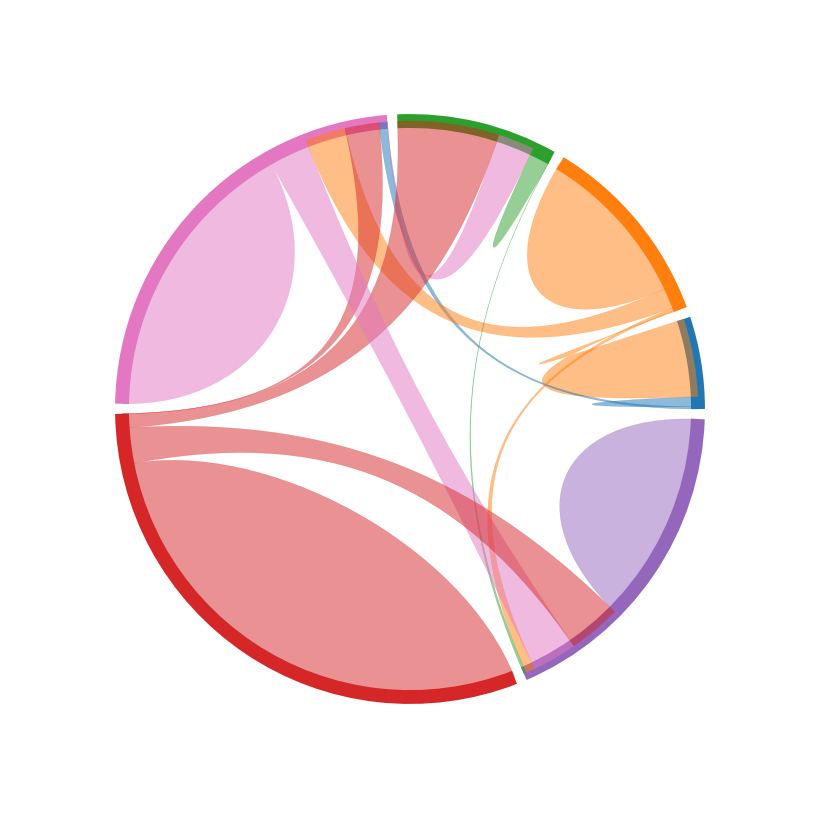

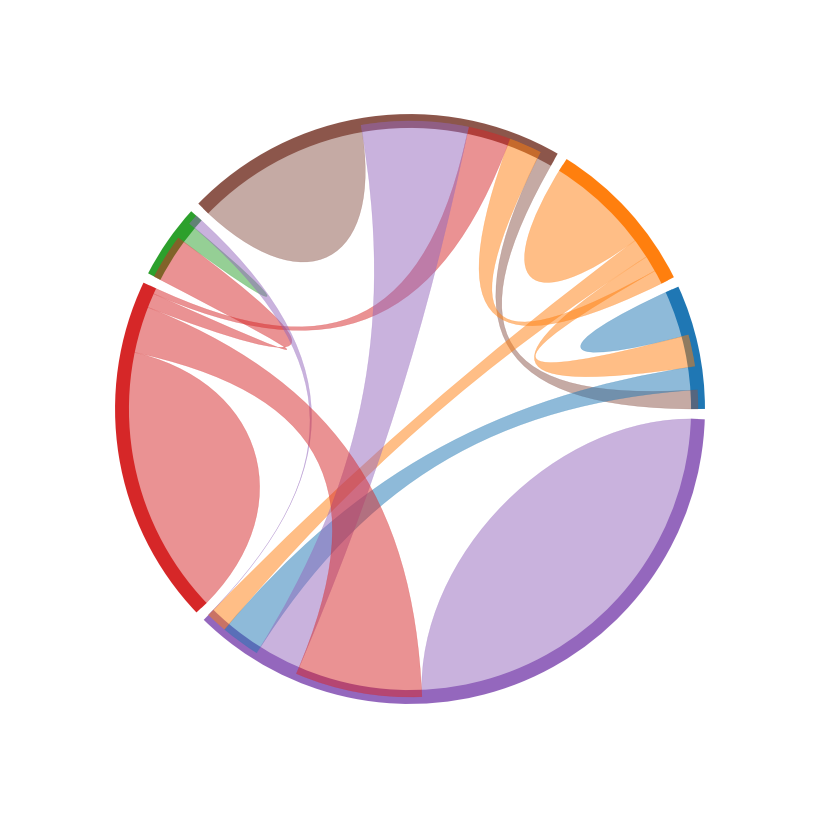

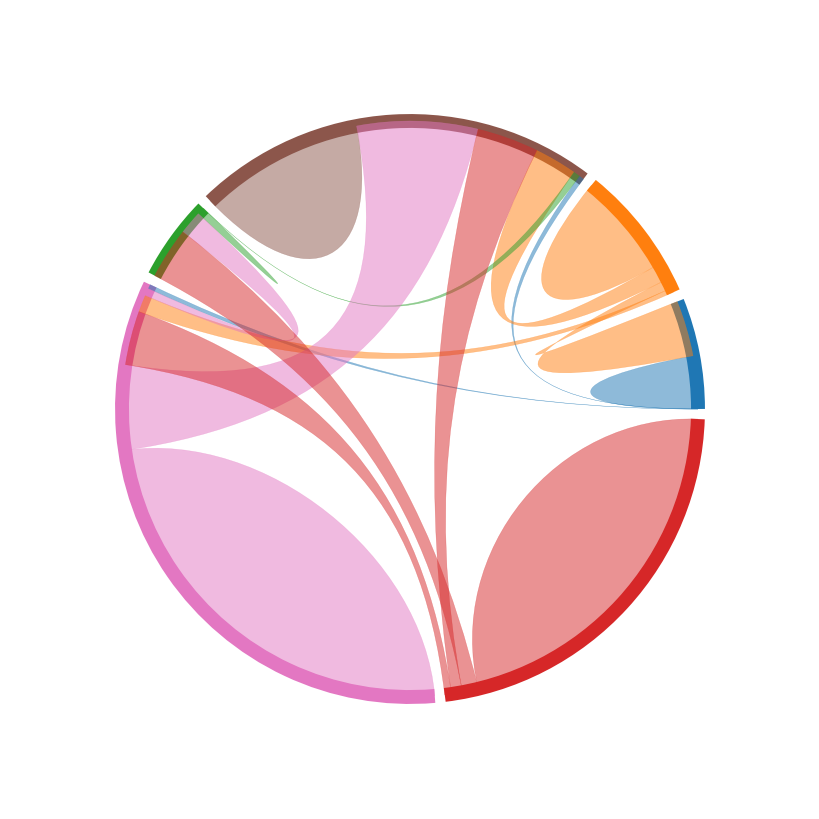

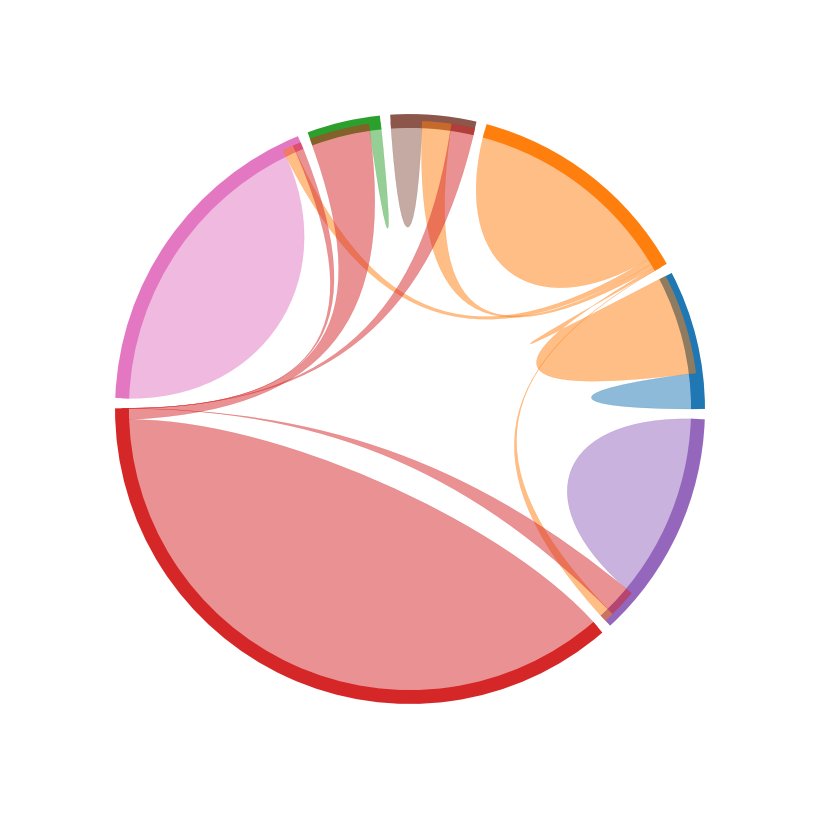

In [8]:
for sample in stlearn_overalls:
    # mmcci.plt.network_plot(sample)
    mmcci.plt.chord_plot(sample, colors=colors, label_size=0)

stlearn_int = mmcci.it.integrate_samples(stlearn_cci)
stlearn_overall = mmcci.it.calculate_overall_interactions(stlearn_int)
# mmcci.plt.network_plot(stlearn_overall)
mmcci.plt.chord_plot(stlearn_overall, colors=colors, label_size=0)

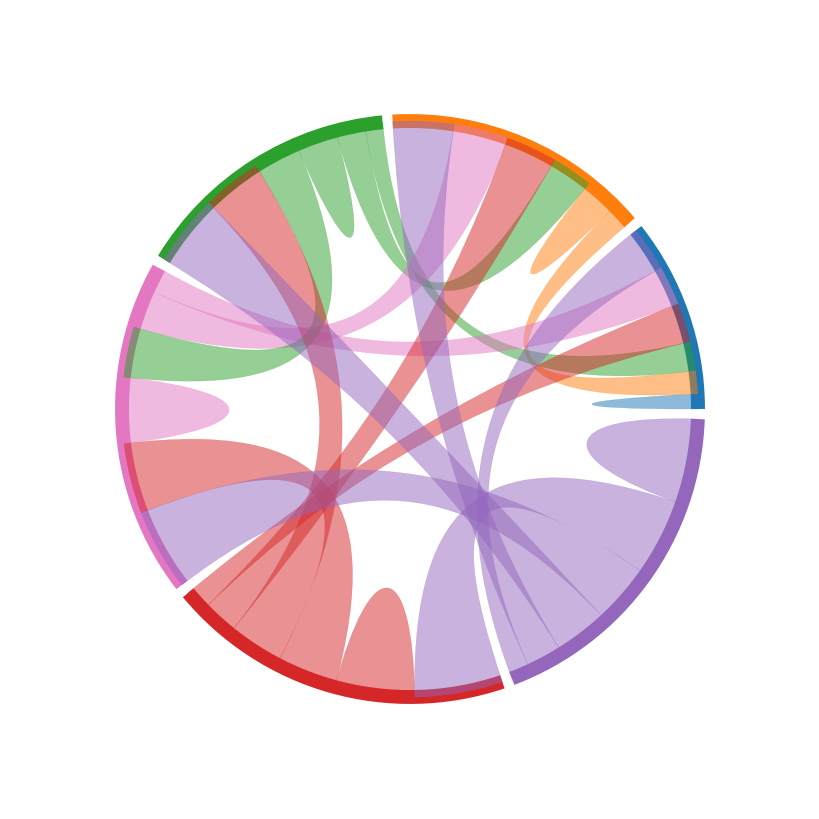

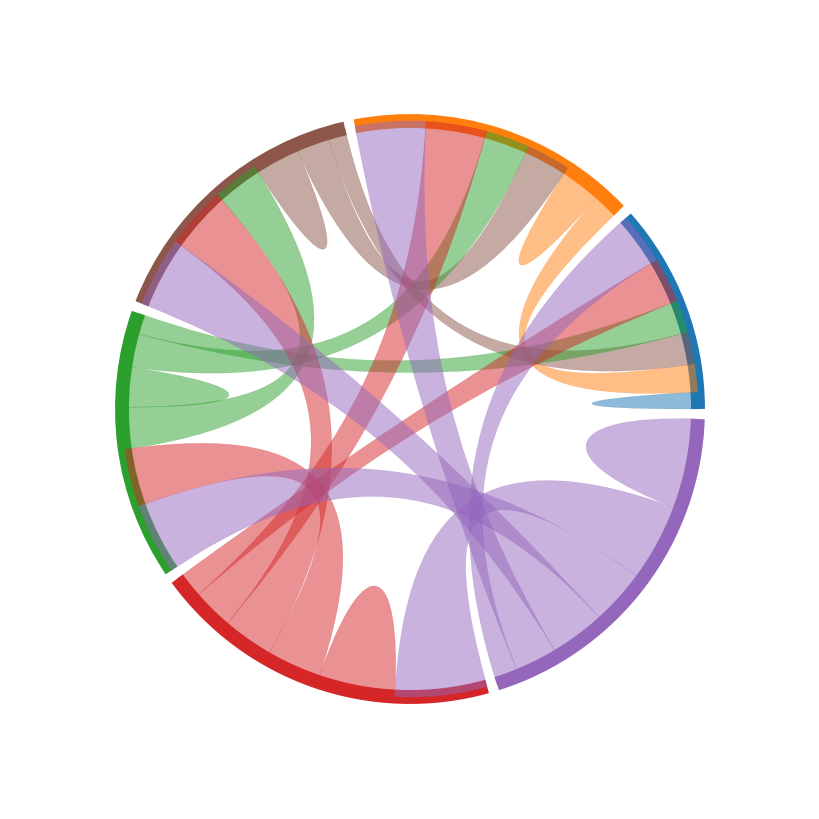

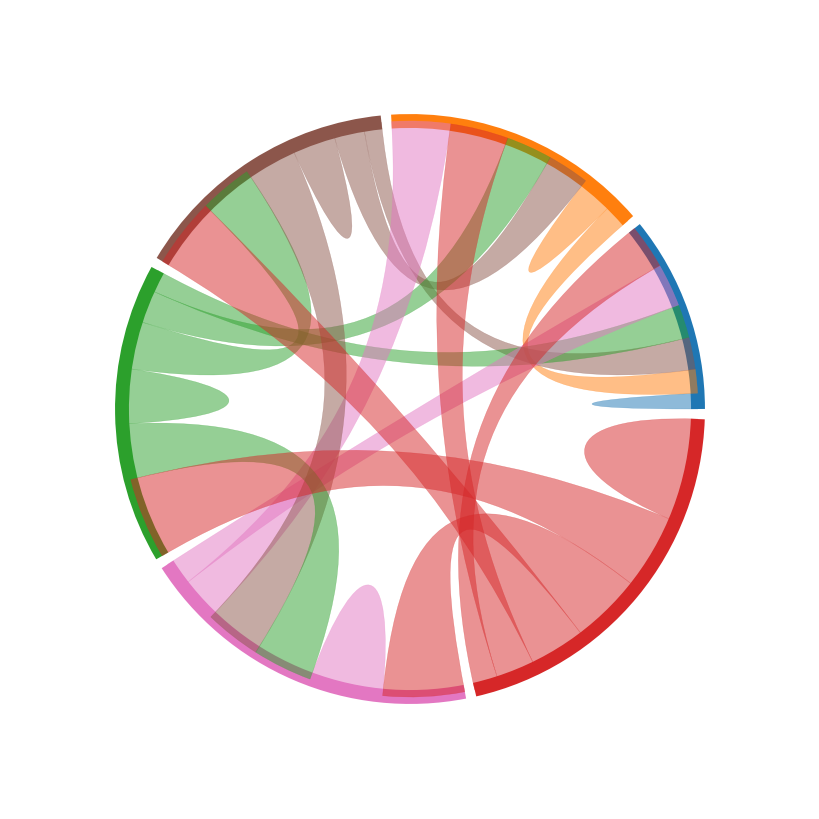

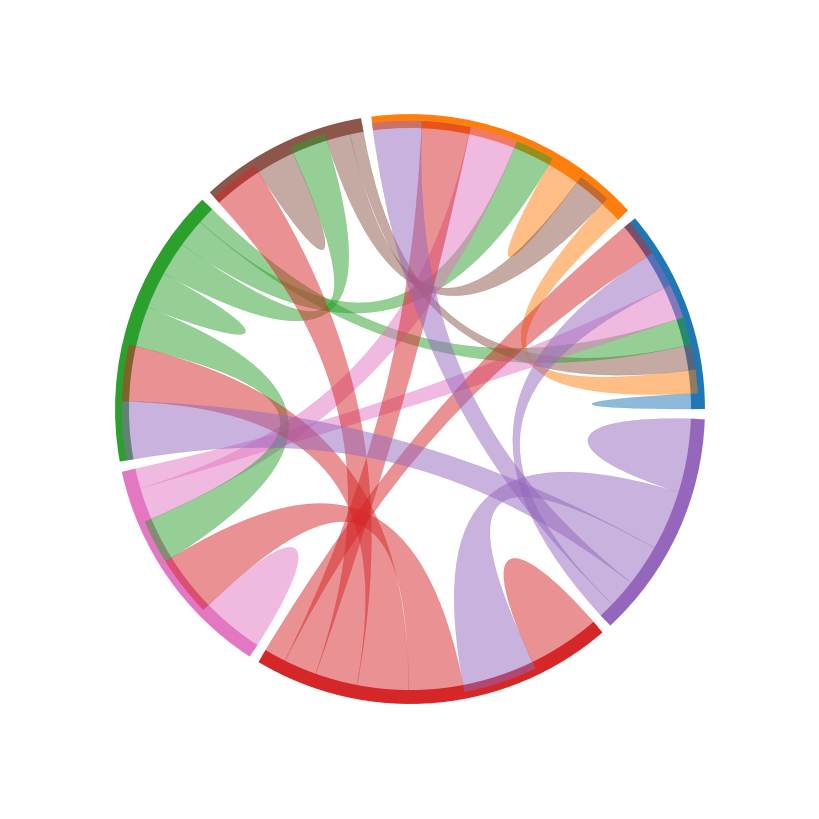

In [9]:
for sample in squidpy_overalls:
    # mmcci.plt.network_plot(sample)
    mmcci.plt.chord_plot(sample, colors=colors, label_size=0)

squidpy_int = mmcci.it.integrate_samples(squidpy_cci)
squidpy_overall = mmcci.it.calculate_overall_interactions(squidpy_int)
# mmcci.plt.network_plot(squidpy_overall)
mmcci.plt.chord_plot(squidpy_overall, colors=colors, label_size=0)

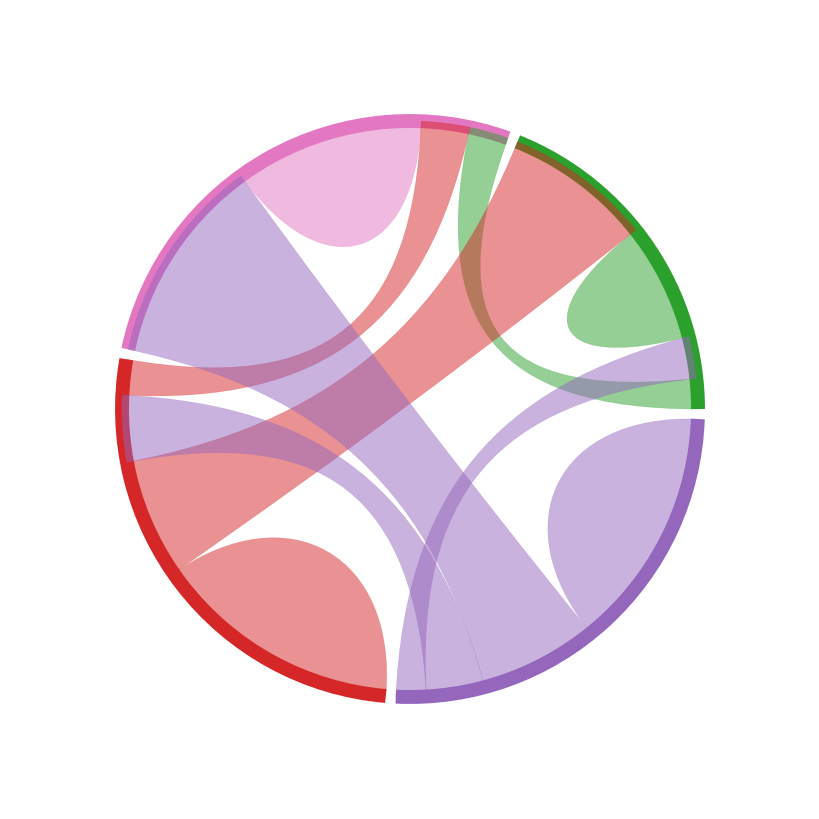

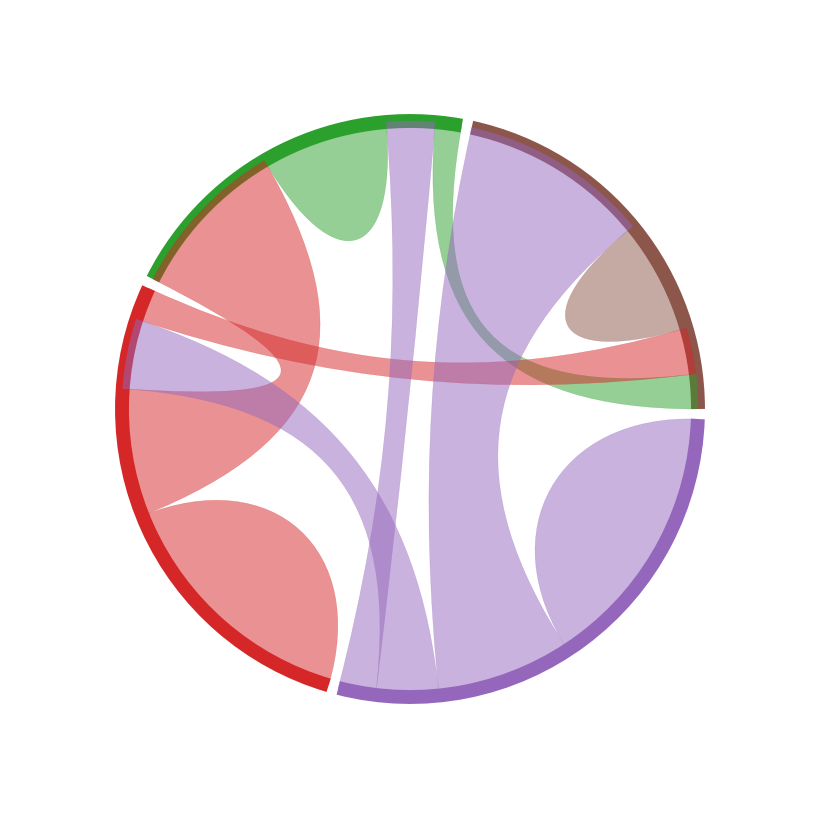

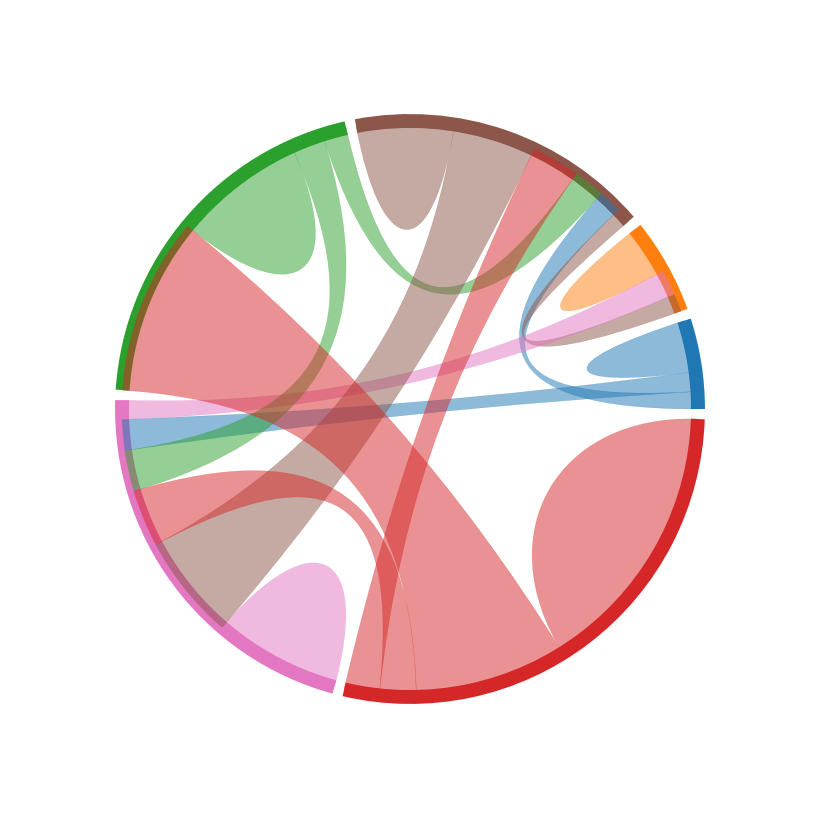

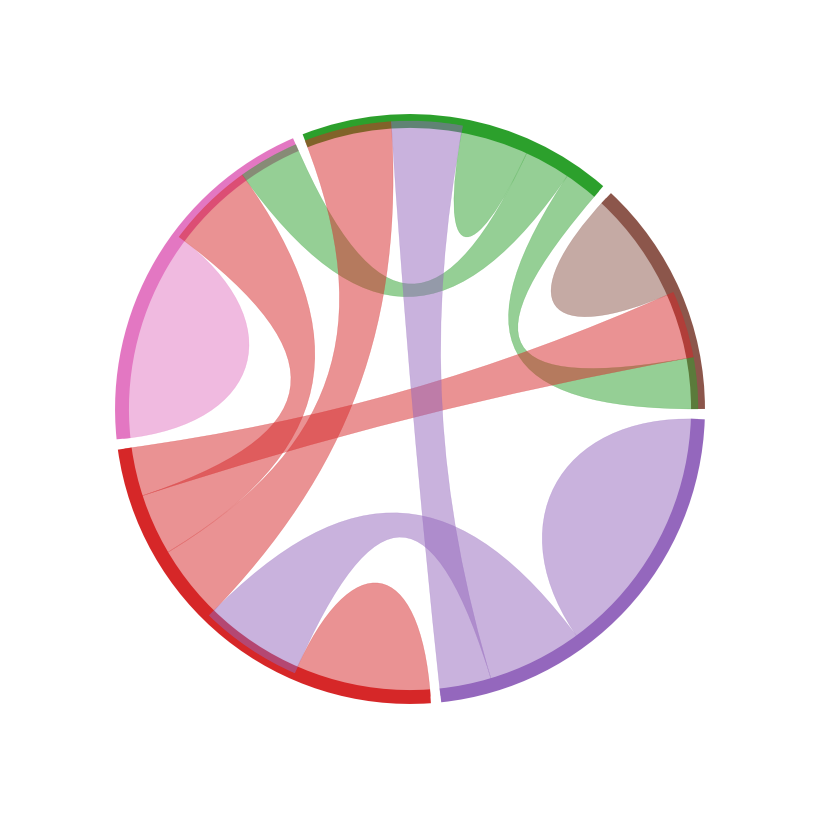

In [10]:
for sample in cellchat_overalls:
    # mmcci.plt.network_plot(sample)
    mmcci.plt.chord_plot(sample, colors=colors, label_size=0)

cellchat_int = mmcci.it.integrate_samples(cellchat_cci)
cellchat_overall = mmcci.it.calculate_overall_interactions(cellchat_int)
# mmcci.plt.network_plot(cellchat_overall)
mmcci.plt.chord_plot(cellchat_overall, colors=colors, label_size=0)

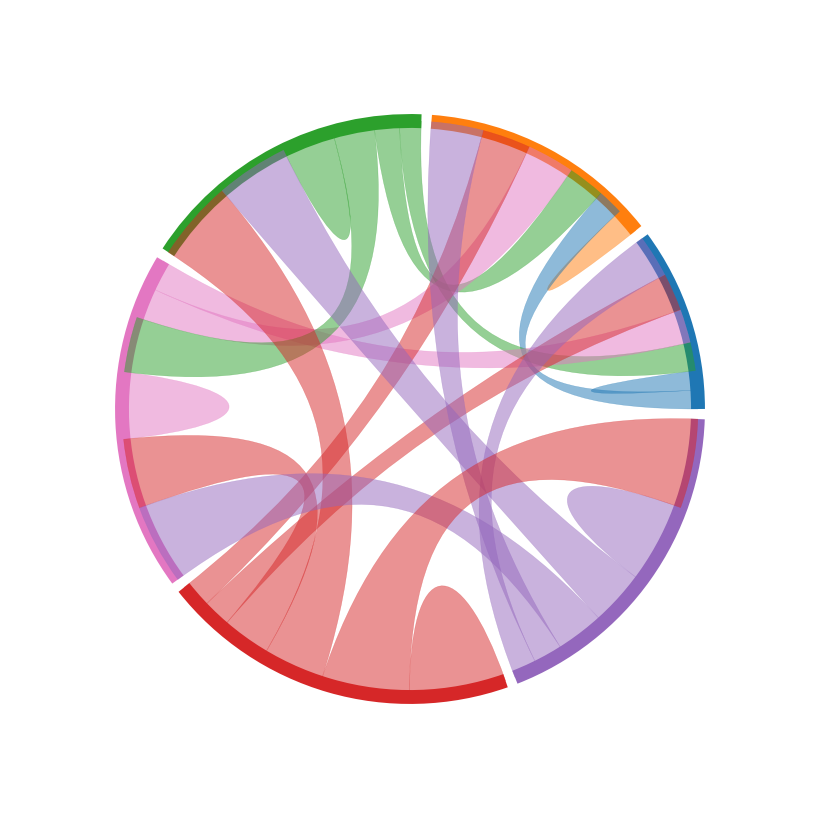

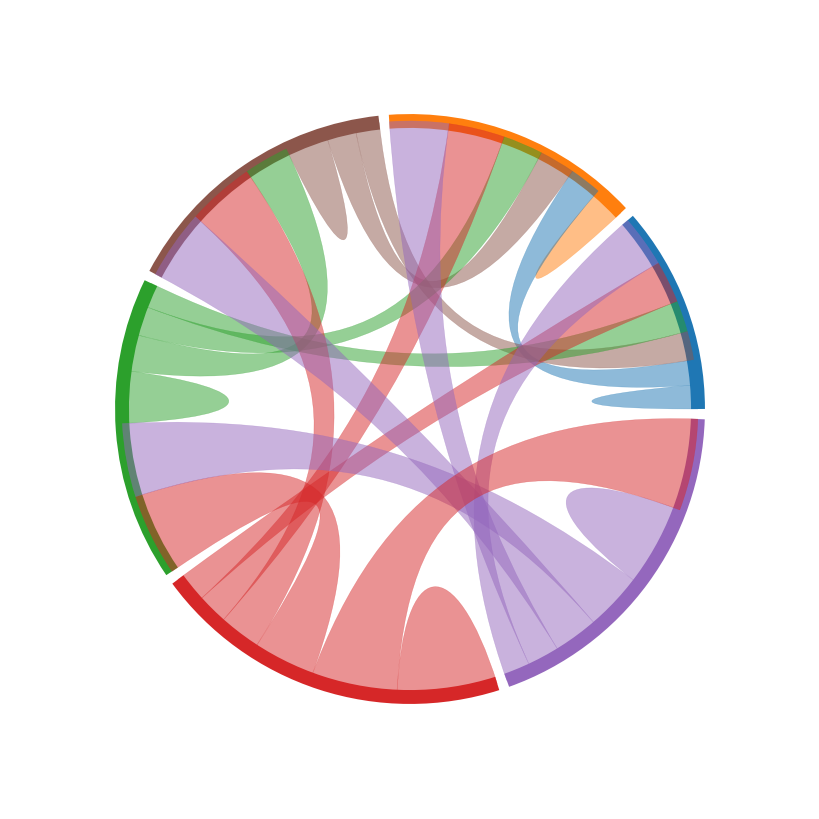

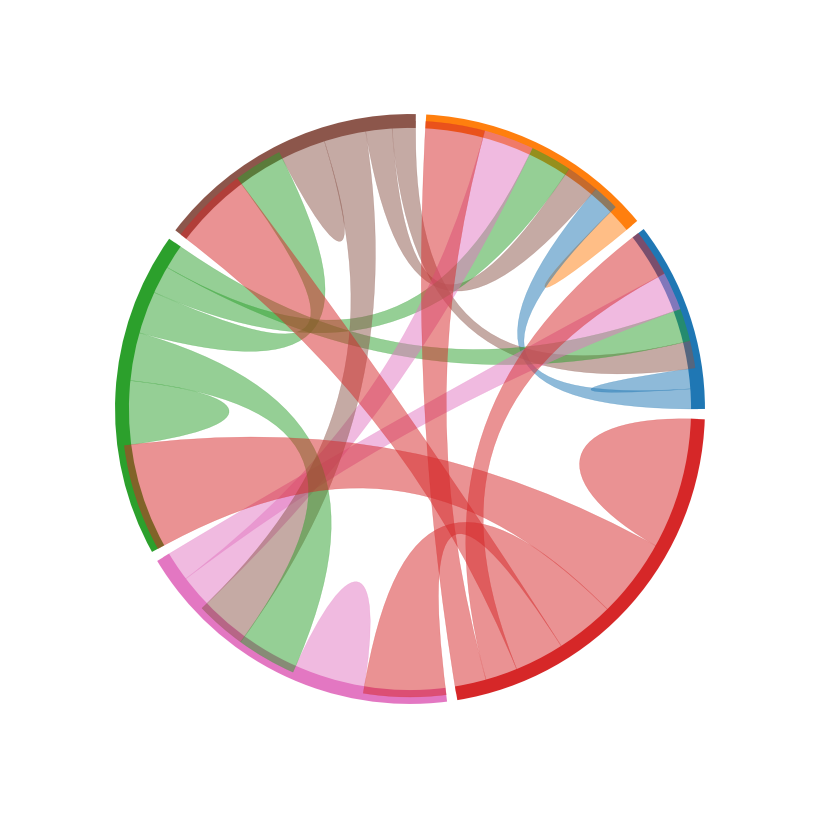

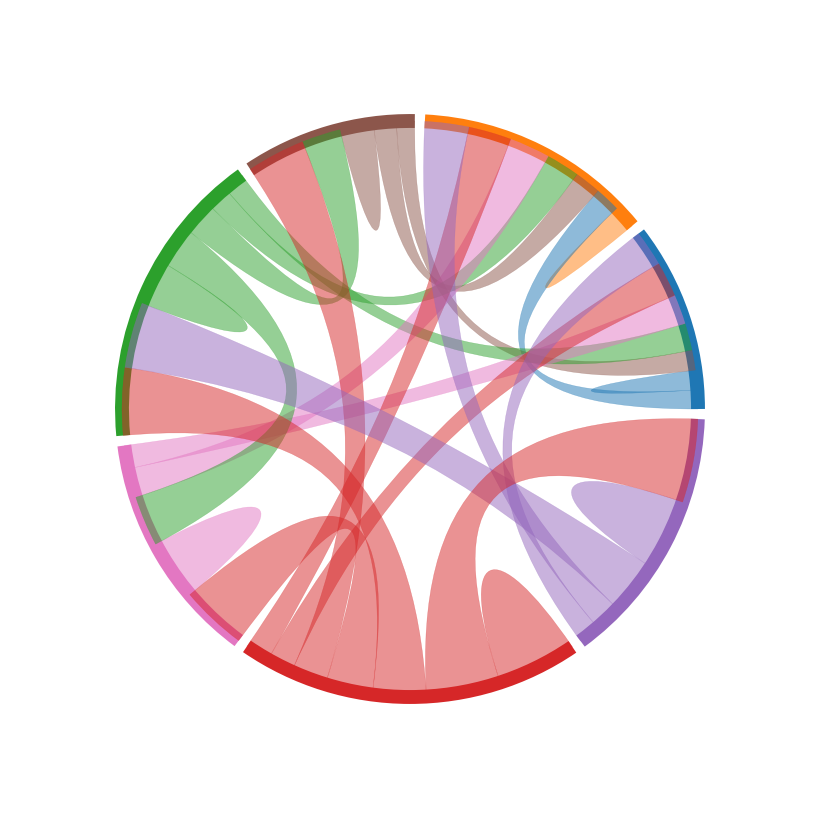

In [11]:
for sample in natmi_overalls:
    # mmcci.plt.network_plot(sample)
    mmcci.plt.chord_plot(sample, colors=colors, label_size=0)

natmi_int = mmcci.it.integrate_samples(natmi_cci)
natmi_overall = mmcci.it.calculate_overall_interactions(natmi_int)
# mmcci.plt.network_plot(natmi_overall)
mmcci.plt.chord_plot(natmi_overall, colors=colors, label_size=0)